# Riemannian Geometry for Molecular Surface Approximation (RGMolSA)

**Contributing Authors:** Stuart J. Hall, Daniel J. Cole, Thomas Murphy, Rachael M. E. Pirie

This notebook accompanies our [paper](https://arxiv.org/pdf/2301.04424.pdf) detailing a novel method for molecular surface approximation based on Riemannian Geometry. The descriptor produced in this notebook represents the (2k+1)x(2k+1) Hermitian matrix associated with the surface. 

This notebook can be used to replicate the small screen detailed in the paper, comparing the shape of a series of PDE5 inhibitors known to have similar shape. Note that the method is currently still under development, and this notebook is not designed to be used for full virtual screens. 

In [2]:
import sys
import os
sys.path.append(r'C:/Users/racha/Documents/Newcastle/KQMolSA/scripts')  # replace with path to python scripts
import numpy as np

from utils import get_score
from get_descriptor import get_descriptor

from rdkit.Chem import PandasTools, Draw

root = r'C:/Users/racha/Documents/Newcastle/KQMolSA/data'  # specify directory containing data

In [3]:
# define values of k to consider
k_vals = [1, 2]

## Single Conformer

The following cells compute the descriptor and calculate the similarity of a single conformer for each of Sildenafil, Vardenafil and Tadalafil. 

In [4]:
# load data
data = PandasTools.LoadSDF(os.path.join(root, 'SVT.sdf'))  # replace with path to data
mols = list(data['ROMol'])

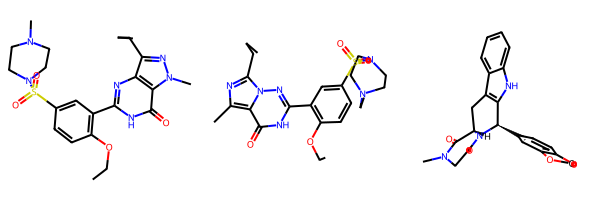

In [5]:
# visualise molecules
Draw.MolsToGridImage(mols)

In [6]:
# get the shape descriptor for each molecule in the list
descriptor = [get_descriptor(mol, k_vals) for mol in mols]

print(descriptor)

[descriptor(surface_area=314.5665223136402, kq_shape=[array([[ 2.15401442+0.j        , -2.42895374+0.85273504j,
         2.4013861 -1.92333274j],
       [-2.42895374-0.85273504j,  3.07704032+0.j        ,
        -3.469967  +1.21828309j],
       [ 2.4013861 +1.92333274j, -3.469967  -1.21828309j,
         4.39587668+0.j        ]]), array([[ 1.55204766+0.j        , -1.75062449+0.61383513j,
         1.73183615-1.38474437j, -1.40574916+2.24685636j,
         0.69697589-3.0903032j ],
       [-1.75062449-0.61383513j,  2.2173813 +0.j        ,
        -2.50108523+0.87697503j,  2.47424357-1.97835972j,
        -2.0083696 +3.21004501j],
       [ 1.73183615+1.38474437j, -2.50108523-0.87697503j,
         3.16793335+0.j        , -3.57325747+1.25291917j,
         3.53491055-2.82644962j],
       [-1.40574916-2.24685636j,  2.47424357+1.97835972j,
        -3.57325747-1.25291917j,  4.52597366+0.j        ,
        -5.10505539+1.79002548j],
       [ 0.69697589+3.0903032j , -2.0083696 -3.21004501j,
         3

In [7]:
# compute the distance between molecules
# function returns the absolute distance and the similarity score between 0 and 1 and "self" for self comparison

scores1, scores2 = np.empty((len(descriptor), len(descriptor)), dtype=object), np.empty((len(descriptor), len(descriptor)), dtype=object)

for i in range(len(descriptor)):
    sa_query = descriptor[i].surface_area
    for j in range(len(descriptor)):
        sa_test = descriptor[j].surface_area
        d_k1, sim_score_k1, x0 = get_score(descriptor[i].kq_shape[0], descriptor[j].kq_shape[0], sa_query, sa_test, k_vals[0], i, j)
        d_k2, sim_score_k2, x0 = get_score(descriptor[i].kq_shape[1], descriptor[j].kq_shape[1], sa_query, sa_test, k_vals[1], i, j, x0)
        
        #append shape scores for each k
        scores1[i][j] = sim_score_k1
        scores2[i][j] = sim_score_k2

In [8]:
print(scores1)

[['self' 0.916 0.448]
 [0.916 'self' 0.432]
 [0.448 0.432 'self']]


In [9]:
print(scores2)

[['self' 0.634 0.479]
 [0.638 'self' 0.47]
 [0.475 0.47 'self']]


## Multi-Conformer Similarity

The following cells compute the similarity between different conformers of the same molecule. The supplied datasets provide 11 random and 11 low energy conformers for Sildenafil, Vardenafil and Tadalafil, generated using RDKit. 

In [10]:
# Sildenafil Random Conformers

# load data
data = PandasTools.LoadSDF(os.path.join(root, 'sildenafil_confs_10random.sdf')) 
sildenafil_random = list(data['ROMol'])

# get descriptors
sildenafil_random_descriptors = [get_descriptor(mol, k_vals) for mol in sildenafil_random]  

# compute similarity
scores_sildenafil_random1, scores_sildenafil_random2 = np.empty((len(sildenafil_random_descriptors), len(sildenafil_random_descriptors)), dtype=object), np.empty((len(sildenafil_random_descriptors), len(sildenafil_random_descriptors)), dtype=object)

for i in range(len(sildenafil_random_descriptors)):
    sa_query = sildenafil_random_descriptors[i].surface_area
    for j in range(len(sildenafil_random_descriptors)):
        sa_test = sildenafil_random_descriptors[j].surface_area
        d_k1, sim_score_k1, x0 = get_score(sildenafil_random_descriptors[i].kq_shape[0], sildenafil_random_descriptors[j].kq_shape[0], sa_query, sa_test, k_vals[0], i, j)
        d_k2, sim_score_k2, x0 = get_score(sildenafil_random_descriptors[i].kq_shape[1], sildenafil_random_descriptors[j].kq_shape[1], sa_query, sa_test, k_vals[1], i, j, x0)
        
        #append shape scores for each k
        scores_sildenafil_random1[i][j] = sim_score_k1
        scores_sildenafil_random2[i][j] = sim_score_k2

print(scores_sildenafil_random1)
print(scores_sildenafil_random2)

[['self' 0.855 0.751 0.76 0.886 0.713 0.915 0.977 0.81 0.788 0.759]
 [0.855 'self' 0.841 0.853 0.939 0.789 0.915 0.854 0.928 0.897 0.853]
 [0.751 0.842 'self' 0.964 0.814 0.45 0.795 0.755 0.888 0.919 0.952]
 [0.76 0.856 0.954 'self' 0.828 0.898 0.806 0.764 0.904 0.936 0.981]
 [0.887 0.941 0.814 0.828 'self' 0.769 0.953 0.889 0.893 0.864 0.827]
 [0.713 0.789 0.915 0.898 0.769 'self' 0.751 0.717 0.831 0.857 0.9]
 [0.913 0.913 0.794 0.806 0.954 0.751 'self' 0.921 0.867 0.84 0.804]
 [0.972 0.853 0.751 0.764 0.892 0.717 0.92 'self' 0.815 0.793 0.763]
 [0.81 0.923 0.888 0.906 0.892 0.831 0.867 0.814 'self' 0.953 0.904]
 [0.788 0.891 0.914 0.934 0.862 0.857 0.84 0.792 0.957 'self' 0.931]
 [0.759 0.852 0.946 0.957 0.828 0.9 0.804 0.763 0.904 0.939 'self']]
[['self' 0.658 0.603 0.609 0.651 0.683 0.589 0.656 0.584 0.595 0.576]
 [0.652 'self' 0.576 0.656 0.766 0.725 0.644 0.69 0.636 0.669 0.615]
 [0.578 0.607 'self' 0.608 0.591 0.46 0.572 0.581 0.582 0.62 0.55]
 [0.611 0.658 0.618 'self' 0.632 0.

In [ ]:
# Sildenafil Low Energy Conformers

# load data
data = PandasTools.LoadSDF(os.path.join(root, 'sildenafil_confs_10.sdf')) 
sildenafil_lowe = list(data['ROMol'])

# get descriptors
sildenafil_lowe_descriptors = [get_descriptor(mol, k_vals) for mol in sildenafil_lowe] 

# compute similarity
scores_sildenafil_lowe1, scores_sildenafil_lowe2 = np.empty((len(sildenafil_lowe_descriptors), len(sildenafil_lowe_descriptors)), dtype=object), np.empty((len(sildenafil_lowe_descriptors), len(sildenafil_lowe_descriptors)), dtype=object)

for i in range(len(sildenafil_lowe_descriptors)):
    sa_query = sildenafil_lowe_descriptors[i].surface_area
    for j in range(len(sildenafil_lowe_descriptors)):
        sa_test = sildenafil_lowe_descriptors[j].surface_area
        d_k1, sim_score_k1, x0 = get_score(sildenafil_lowe_descriptors[i].kq_shape[0], sildenafil_lowe_descriptors[j].kq_shape[0], sa_query, sa_test, k_vals[0], i, j)
        d_k2, sim_score_k2, x0 = get_score(sildenafil_lowe_descriptors[i].kq_shape[1], sildenafil_lowe_descriptors[j].kq_shape[1], sa_query, sa_test, k_vals[1], i, j, x0)
        
        #append shape scores for each k
        scores_sildenafil_lowe1[i][j] = sim_score_k1
        scores_sildenafil_lowe2[i][j] = sim_score_k2

print('Scores k=1: ')        
print(scores_sildenafil_lowe1)
print('Scores k=2: ') 
print(scores_sildenafil_lowe2)

In [ ]:
# Vardenafil Random Conformers

# load data
data = PandasTools.LoadSDF(os.path.join(root, 'vardenafil_confs_10random.sdf')) 
vardenafil_random = list(data['ROMol'])

# get descriptors
vardenafil_random_descriptors = [get_descriptor(mol, k_vals) for mol in vardenafil_random]  

# compute similarity
scores_vardenafil_random1, scores_vardenafil_random2 = np.empty((len(vardenafil_random_descriptors), len(vardenafil_random_descriptors)), dtype=object), np.empty((len(vardenafil_random_descriptors), len(vardenafil_random_descriptors)), dtype=object)

for i in range(len(vardenafil_random_descriptors)):
    sa_query = vardenafil_random_descriptors[i].surface_area
    for j in range(len(vardenafil_random_descriptors)):
        sa_test = vardenafil_random_descriptors[j].surface_area
        d_k1, sim_score_k1, x0 = get_score(vardenafil_random_descriptors[i].kq_shape[0], vardenafil_random_descriptors[j].kq_shape[0], sa_query, sa_test, k_vals[0], i, j)
        d_k2, sim_score_k2, x0 = get_score(vardenafil_random_descriptors[i].kq_shape[1], vardenafil_random_descriptors[j].kq_shape[1], sa_query, sa_test, k_vals[1], i, j, x0)
        
        #append shape scores for each k
        scores_vardenafil_random1[i][j] = sim_score_k1
        scores_vardenafil_random2[i][j] = sim_score_k2

print('Scores k=1: ')         
print(scores_vardenafil_random1)
print('Scores k=2: ') 
print(scores_vardenafil_random2)

In [ ]:
# Vardenafil Low Energy Conformers

# load data
data = PandasTools.LoadSDF(os.path.join(root, 'vardenafil_confs_10.sdf')) 
vardenafil_lowe = list(data['ROMol'])

# get descriptors
vardenafil_lowe_descriptors = [get_descriptor(mol, k_vals) for mol in vardenafil_lowe] 

# compute similarity
scores_vardenafil_lowe1, scores_vardenafil_lowe2 = np.empty((len(vardenafil_lowe_descriptors), len(vardenafil_lowe_descriptors)), dtype=object), np.empty((len(vardenafil_lowe_descriptors), len(vardenafil_lowe_descriptors)), dtype=object)

for i in range(len(vardenafil_lowe_descriptors)):
    sa_query = vardenafil_lowe_descriptors[i].surface_area
    for j in range(len(vardenafil_lowe_descriptors)):
        sa_test = vardenafil_lowe_descriptors[j].surface_area
        d_k1, sim_score_k1, x0 = get_score(vardenafil_lowe_descriptors[i].kq_shape[0], vardenafil_lowe_descriptors[j].kq_shape[0], sa_query, sa_test, k_vals[0], i, j)
        d_k2, sim_score_k2, x0 = get_score(vardenafil_lowe_descriptors[i].kq_shape[1], vardenafil_lowe_descriptors[j].kq_shape[1], sa_query, sa_test, k_vals[1], i, j, x0)
        
        #append shape scores for each k
        scores_vardenafil_lowe1[i][j] = sim_score_k1
        scores_vardenafil_lowe2[i][j] = sim_score_k2

print('Scores k=1: ') 
print(scores_vardenafil_lowe1)
print('Scores k=2: ') 
print(scores_vardenafil_lowe2)

In [ ]:
# Tadalafil Random Conformers

# load data
data = PandasTools.LoadSDF(os.path.join(root, 'tadalafil_confs_10random.sdf')) 
tadalafil_random = list(data['ROMol'])

# get descriptors
tadalafil_random_descriptors = [get_descriptor(mol, k_vals) for mol in tadalafil_random]  

# compute similarity
scores_tadalafil_random1, scores_tadalafil_random2 = np.empty((len(tadalafil_random_descriptors), len(tadalafil_random_descriptors)), dtype=object), np.empty((len(tadalafil_random_descriptors), len(tadalafil_random_descriptors)), dtype=object)

for i in range(len(tadalafil_random_descriptors)):
    sa_query = tadalafil_random_descriptors[i].surface_area
    for j in range(len(tadalafil_random_descriptors)):
        sa_test = tadalafil_random_descriptors[j].surface_area
        d_k1, sim_score_k1, x0 = get_score(tadalafil_random_descriptors[i].kq_shape[0], tadalafil_random_descriptors[j].kq_shape[0], sa_query, sa_test, k_vals[0], i, j)
        d_k2, sim_score_k2, x0 = get_score(tadalafil_random_descriptors[i].kq_shape[1], tadalafil_random_descriptors[j].kq_shape[1], sa_query, sa_test, k_vals[1], i, j, x0)
        
        #append shape scores for each k
        scores_tadalafil_random1[i][j] = sim_score_k1
        scores_tadalafil_random2[i][j] = sim_score_k2

print('Scores k=1: ')         
print(scores_tadalafil_random1)
print('Scores k=2: ') 
print(scores_tadalafil_random2)

In [ ]:
# Tadalafil Low Energy Conformers

# load data
data = PandasTools.LoadSDF(os.path.join(root, 'tadalafil_confs_10.sdf')) 
tadalafil_lowe = list(data['ROMol'])

# get descriptors
tadalafil_lowe_descriptors = [get_descriptor(mol, k_vals) for mol in tadalafil_lowe] 

# compute similarity
scores_tadalafil_lowe1, scores_tadalafil_lowe2 = np.empty((len(tadalafil_lowe_descriptors), len(tadalafil_lowe_descriptors)), dtype=object), np.empty((len(tadalafil_lowe_descriptors), len(tadalafil_lowe_descriptors)), dtype=object)

for i in range(len(tadalafil_lowe_descriptors)):
    sa_query = tadalafil_lowe_descriptors[i].surface_area
    for j in range(len(tadalafil_lowe_descriptors)):
        sa_test = tadalafil_lowe_descriptors[j].surface_area
        d_k1, sim_score_k1, x0 = get_score(tadalafil_lowe_descriptors[i].kq_shape[0], tadalafil_lowe_descriptors[j].kq_shape[0], sa_query, sa_test, k_vals[0], i, j)
        d_k2, sim_score_k2, x0 = get_score(tadalafil_lowe_descriptors[i].kq_shape[1], tadalafil_lowe_descriptors[j].kq_shape[1], sa_query, sa_test, k_vals[1], i, j, x0)
        
        #append shape scores for each k
        scores_tadalafil_lowe1[i][j] = sim_score_k1
        scores_tadalafil_lowe2[i][j] = sim_score_k2

print('Scores k=1: ') 
print(scores_tadalafil_lowe1)
print('Scores k=2: ') 
print(scores_tadalafil_lowe2)